# Hartree Fock Approximation. 

### Structure of notebook

1. Parameters of the cattering region are defined.
2. Parameters of the fermi dirac function & Integration interval are defined.
3. Electron Density is self-consistently calculated
4. The magnetocurrent $\Delta I(m,V) = I(m) - I(-m)$ is calculated.
5. P value is calculated

## Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Path to modules

In [5]:
import sys
sys.path.insert(0, '/Users/khhuisman/Documents/Jupyter_notebooks/Github_Coulomb_Paper/Modules_Coulomb_Github')

# sys.path.insert(0, '<path_to_modules>')

## Scattering Region

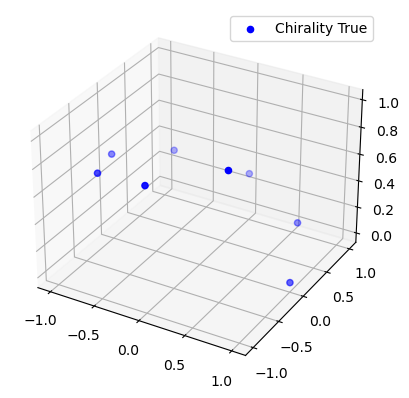

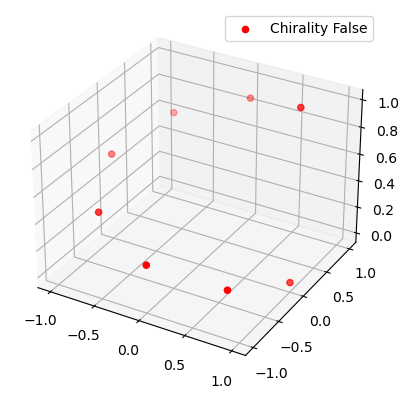

In [6]:
import ChiralChainModel_git
import Geometry_Git
Geometry_Git.plot3d_chain(a=1,c=1,M=1,N=8)

## Functions for electron density

In [7]:
import Integration_Trapz_git

In [8]:
import negf_git


## Define Scattering Region

In [9]:
Lm = 8             #number of sites 
chirality = True   #handedness of molecule 
N = Lm             # Number of sites within one winding
M = 1              # Number of windings
a = 1              # radius of helix
c = 1              # pitch of helix


epsilon = 0 # onsite energy
t = 2.4     # hopping paramter

# List of Spin-Orbit Coupling parameter
lambdalist = [(1*(10**-1))*t,(1*(10**-3))*t]
# List of interaction strength
Ulist = [ 0.5*t, 2*t] 


#Gamma Matrix
kmax  = 4      # Number spin up + down sites coupled to each lead
gamma = 0.5    # coupling strength
pz    = 0.5    # magnetic polarization

pz_P = abs(pz)
pz_M = -abs(pz)


T = 300 # Kelvin Temperature of leads
betaL,betaR = negf_git.func_beta(T), negf_git.func_beta(T) # 1/ElectronVolt




# Bias window

In [15]:
Vmax = 1  # Maximum bias voltage [eV]
dV = 0.5 # stepsize
V_list_total = np.arange(-Vmax,Vmax + dV,dV)

# Energies to integrate over, Fermi Energy

In [16]:
def func_energies(Hamiltonian0,U,npoints):
    '''
    Input:
    Hamiltonian0 = molecule without interaction (U=0)
    U = interaction strength
    npoints = number of energy points in window [emin,emax]
    Output:
    emax = upper bound of intergral
    emin = lowest eigenvalue of Hamiltonian0
    energiesreal = list of energies between [emin-1000,emax] (make sure the emax < ef +Vmax/2)
    eflist = list of fermi energies for which to calculate electron densities.
    '''
    evlist = np.linalg.eigh(Hamiltonian0)[0]
    e_lumo = evlist[int(Hamiltonian0.shape[0]/2)-1]
    e_homo = evlist[int(Hamiltonian0.shape[0]/2)]
    #Fermi Energy
    hl_gap = e_lumo - e_homo
    
    
    
    #lower,upper bound for Glesser function
    emin = np.round(int(10*min(evlist))/10 - 10,2) #lower bound for integrals
    emax = np.round(int(10*max(evlist))/10 + 10,2)   #lower bound for integrals
    
    
    energies_zero4000 = np.linspace(emin-1000,emin,2000) #In wide band the density integrand have very long "tail"
   
    energiesreal_prime = np.linspace(emin,emax,npoints)
    
    energiesreal = Integration_Trapz_git.jointwolist(energies_zero4000,energiesreal_prime)

#     eflist = [U/2 + abs(np.round( 0  + kappa*hl_gap/2,11)) for kappa in [0.25] ]
    
    #IMPORTANT: Note that ef = 0 is the "symmetric fermi energy", 
    #           since we shifted U<n> -> U(<n>-1/2) in the module:  "negf_git", function: "Hamiltonian_HF".
    eflist = [ 0  ] 
    
    return emin,emax,npoints,energiesreal,eflist

# Self-Consistent criteria & Integration

Comment on the convergence: Hartree Fock converges well for small U i.e. U<t.

In [24]:
tol = 10**-3
max_iteration = 100

npoints= 2000

#### Set Paramters

In [25]:
U = Ulist[0]
lambda1 = lambdalist[0]

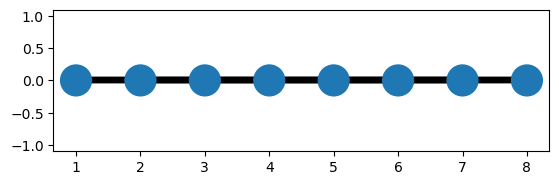

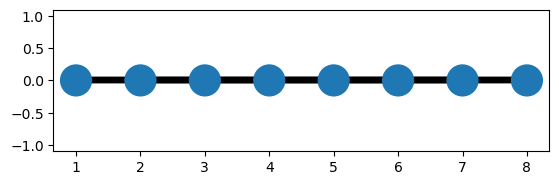

0.5 0.1 0
--- V = -1.0 ---
[0.006 0.005 0.011 0.004 0.007 0.009 0.011 0.004 0.008 0.008 0.012 0.003
 0.007 0.008 0.004 0.006]
[0.002 0.001 0.001 0.001 0.002 0.002 0.001 0.002 0.001 0.002 0.001 0.002
 0.001 0.001 0.    0.002]
[0.    0.001 0.    0.    0.001 0.    0.001 0.    0.001 0.    0.001 0.
 0.    0.    0.001 0.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--- V = -0.5 ---
[0.004 0.003 0.006 0.002 0.003 0.005 0.007 0.002 0.004 0.005 0.007 0.001
 0.004 0.004 0.002 0.004]
[0.001 0.    0.001 0.    0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.    0.001 0.    0.001]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--- V = 0.0 ---
[0.002 0.002 0.005 0.002 0.003 0.003 0.005 0.002 0.003 0.003 0.005 0.002
 0.003 0.003 0.001 0.002]
[0.001 0.001 0.    0.    0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.    0.001 0.    0.001]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--- V = 0.5 ---
[0.002 0.002 0.005 0.002 0.003 0.003 0.005 0.002 0.003 0.003 0.005 0.002
 0.003 0.00

NameError: name 'V_list_totalT' is not defined

In [26]:

GammaR,GammaLP,GammaLM,HamiltonianT,hamiltonian_shape= ChiralChainModel_git.system_hamiltonian0(Lm,
                                                                                epsilon,t, 
                                                                          lambda1,True,
                                                                          a,c,M,N,
                                                                            kmax,gamma,abs(pz)
                                                                        )

GammaR,GammaLP,GammaLM,HamiltonianF,hamiltonian_shape= ChiralChainModel_git.system_hamiltonian0(Lm,
                                                                                epsilon,t, 
                                                                          lambda1,False,
                                                                          a,c,M,N,
                                                                            kmax,gamma,abs(pz)
                                                                        )
emin,emax,npoints,energiesreal,eflist = func_energies(HamiltonianF,U,npoints)


for i in range(len(eflist)):
    ef = eflist[i]

    print(U/t, lambda1/t,ef)



    nP_list_totalF, convglistPF = Integration_Trapz_git.self_consistent_trapz(V_list_total,Vmax,
                                                                          max_iteration,ef,
                                                                        U,
                                                                        HamiltonianF,
                                                                        GammaLP,GammaR, 
                                                                        betaL, betaR,tol,energiesreal)



    nM_list_totalF, convglistMF = Integration_Trapz_git.self_consistent_trapz(V_list_total,Vmax,
                                                                          max_iteration,
                                                                            ef,
                                                                        U,
                                                                        HamiltonianF,
                                                                        GammaLM,GammaR, 
                                                                        betaL, betaR,tol,energiesreal)



    V_list_convgF,nP_list_convF,nM_list_convF    = Integration_Trapz_git.converged_lists(V_list_total,
                                                                              nP_list_totalF , convglistPF,
                                                                                  nM_list_totalF, convglistMF)
    
    
    
    
    nP_list_totalT, convglistPT = Integration_Trapz_git.self_consistent_trapz(V_list_total,Vmax,
                                                                          max_iteration,ef,
                                                                        U,
                                                                        HamiltonianT,
                                                                        GammaLP,GammaR, 
                                                                        betaL, betaR,tol,energiesreal)



    nM_list_totalT, convglistMT = Integration_Trapz_git.self_consistent_trapz(V_list_total,Vmax,
                                                                          max_iteration,
                                                                            ef,
                                                                        U,
                                                                        HamiltonianT,
                                                                        GammaLM,GammaR, 
                                                                        betaL, betaR,tol,energiesreal)



    V_list_convgT,nP_list_convT,nM_list_convT    = Integration_Trapz_git.converged_lists(V_list_total,
                                                                              nP_list_totalT , convglistPT,
                                                                                  nM_list_totalT, convglistMT)

In [27]:
V_list_convgT,nP_list_convT,nM_list_convT    = Integration_Trapz_git.converged_lists(V_list_total,
                                                                              nP_list_totalT , convglistPT,
                                                                                  nM_list_totalT, convglistMT)

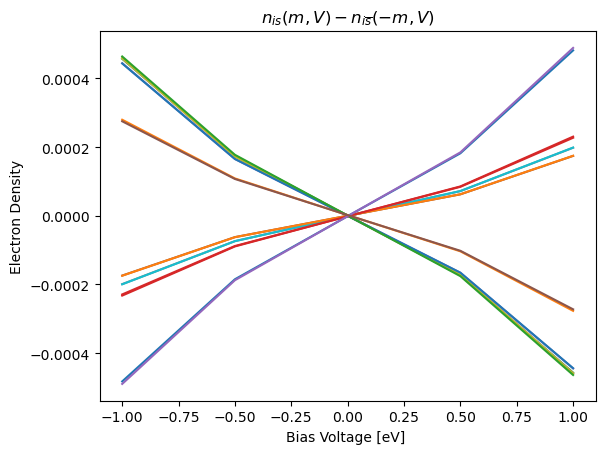

In [29]:

plt.title('$n_{is}(m,V) - n_{i\overline{s}}(-m,V)$')
n_list_total_convgM_swapF = [negf_git.pairwise_swap(nM_list_convF[i]) for i in range(len(nM_list_convF))]

plt.plot(V_list_convgF,np.subtract(nP_list_convF,n_list_total_convgM_swapF))
plt.xlabel('Bias Voltage [eV] ')
plt.ylabel('Electron Density')
plt.show()

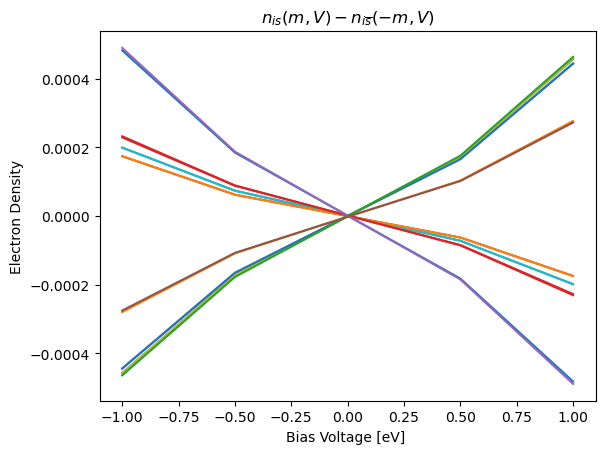

In [30]:

plt.title('$n_{is}(m,V) - n_{i\overline{s}}(-m,V)$')
n_list_total_convgM_swapT= [negf_git.pairwise_swap(nM_list_convT[i]) for i in range(len(nM_list_convT))]

plt.plot(V_list_convgT,np.subtract(nP_list_convT,n_list_total_convgM_swapT))
plt.xlabel('Bias Voltage [eV] ')
plt.ylabel('Electron Density')
plt.show()

# Currents 

In [31]:
import Currents_HF_git as Current_method

# Magnetocurrent $\Delta I(m,V)$ 

In [32]:
for i in range(len(eflist)):
    ef = eflist[i]

    print(U/t, lambda1/t,ef)
    dI_list_quadF,dI_list_err_quadF = Current_method.calc_dI_quad(
                                                V_list_convgF,ef,
                                              HamiltonianF ,
                                              GammaLP,GammaR,
                                              GammaLM,
                                              U,nP_list_convF, nM_list_convF,
                                              betaL,betaR)
    
    
    dI_list_quadT,dI_list_err_quadT = Current_method.calc_dI_quad(
                                                V_list_convgT,ef,
                                              HamiltonianT ,
                                              GammaLP,GammaR,
                                              GammaLM,
                                              U,nP_list_convT, nM_list_convT,
                                              betaL,betaR)







0.5 0.1 0
 --- V = -1.0 ---
 --- V = -0.5 ---
 --- V = 0.0 ---
 --- V = 0.5 ---
 --- V = 1.0 ---
 --- V = -1.0 ---
 --- V = -0.5 ---
 --- V = 0.0 ---
 --- V = 0.5 ---
 --- V = 1.0 ---


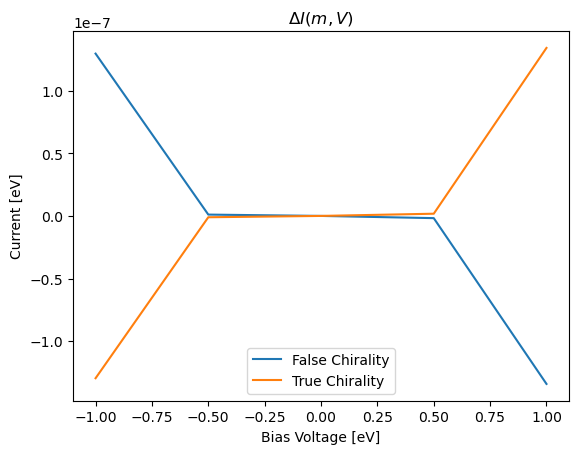

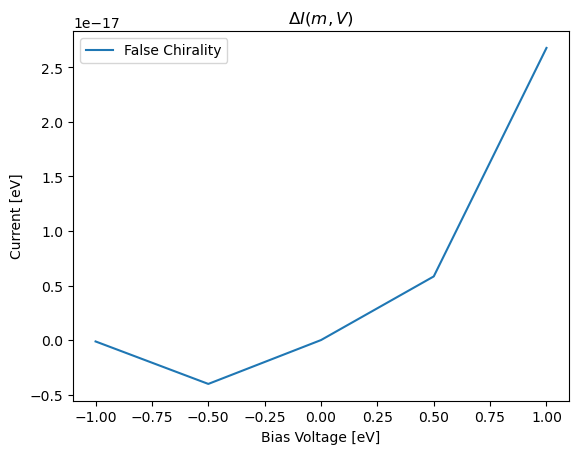

In [36]:
plt.title('$\Delta I(m,V)$')
plt.plot(V_list_convgF,dI_list_quadF,label ='False Chirality')
plt.plot(V_list_convgT,dI_list_quadT,label ='True Chirality')
plt.xlabel('Bias Voltage [eV]')
plt.ylabel('Current [eV]')
plt.legend()
plt.show()

plt.title('$\Delta I(m,V)$')
plt.plot(V_list_convgF,np.add(dI_list_quadF,dI_list_quadT),label ='False +True Chirality')
plt.xlabel('Bias Voltage [eV]')
plt.ylabel('Current [eV]')
plt.legend()
plt.show()

# 5. P Value

In [39]:
import Pvalue

In [40]:
Vlist_primeF,PJ_listF = Pvalue.function_PvaluedI(V_list_convgF,dI_list_quadF,12)
Vlist_primeT,PJ_listT = Pvalue.function_PvaluedI(V_list_convgT,dI_list_quadT,12)

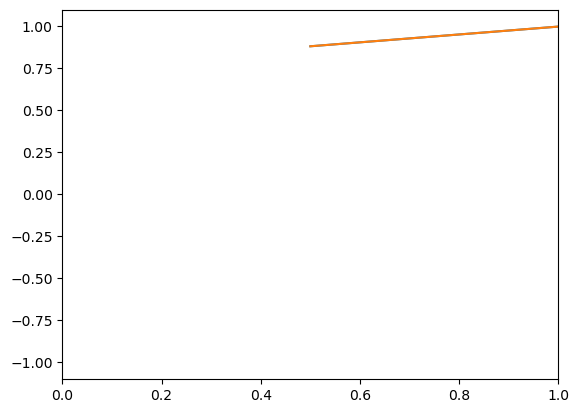

In [41]:
plt.plot(Vlist_primeF,PJ_listF)
plt.plot(Vlist_primeT,PJ_listT)
plt.xlim(0,Vmax)
plt.ylim(-1-0.1,1+0.1)
plt.show()